Importing Dependencies


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt




In [ ]:
cc_data=pd.read_csv('/content/creditcard.csv')
cc_data.to_parquet('df.parquet.gzip',compression='gzip')

In [ ]:
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
cc_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
73372,55105,1.104021,-1.123835,1.008939,-0.460960,-1.502758,0.021138,-1.055043,0.095135,-0.175413,...,0.405906,1.054006,-0.174455,0.155852,0.358077,-0.030114,0.048490,0.042121,119.00,0.0
73373,55105,1.182898,-0.283273,1.123494,0.066948,-1.283276,-0.900451,-0.441870,-0.150647,0.784691,...,0.082278,0.491790,-0.025468,1.078368,0.258355,1.415871,-0.060454,0.014606,22.71,0.0
73374,55106,1.168124,-0.122507,1.251822,0.860341,-1.020137,-0.277310,-0.557856,0.023732,0.802378,...,-0.077921,-0.005984,0.014309,0.452036,0.281031,0.313100,0.020995,0.030389,16.35,0.0
73375,55106,-0.339385,-2.095670,0.271543,-3.066469,0.484794,3.870704,-2.069399,0.184347,-1.615958,...,0.964115,-0.266112,-0.993763,1.033766,0.748706,-0.116168,0.153607,0.268881,322.34,0.0
73376,55107,-1.020407,0.160171,0.152264,-0.093406,-0.978017,0.074549,1.610152,0.117407,-0.948643,...,0.109380,-0.400171,0.835422,-0.428141,-0.464220,NaN,NaN,NaN,NaN,NaN


In [ ]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73377 entries, 0 to 73376
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    73377 non-null  int64  
 1   V1      73377 non-null  float64
 2   V2      73377 non-null  float64
 3   V3      73377 non-null  float64
 4   V4      73377 non-null  float64
 5   V5      73377 non-null  float64
 6   V6      73377 non-null  float64
 7   V7      73377 non-null  float64
 8   V8      73377 non-null  float64
 9   V9      73377 non-null  float64
 10  V10     73377 non-null  float64
 11  V11     73377 non-null  float64
 12  V12     73377 non-null  float64
 13  V13     73377 non-null  float64
 14  V14     73377 non-null  float64
 15  V15     73377 non-null  float64
 16  V16     73377 non-null  float64
 17  V17     73377 non-null  float64
 18  V18     73377 non-null  float64
 19  V19     73377 non-null  float64
 20  V20     73377 non-null  float64
 21  V21     73377 non-null  float64
 22

Checking For Null Values

In [ ]:
cc_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Finding the number of class instances


In [ ]:
cc_data['Class'].value_counts()

0.0    73198
1.0      178
Name: Class, dtype: int64

Divide The Data Into Two Based On Class

In [ ]:
legit_t=cc_data[cc_data.Class==0]
fraud_t=cc_data[cc_data.Class==1]

In [ ]:
print(legit_t.shape)
print(fraud_t.shape)

(73198, 31)
(178, 31)


In [ ]:
legit_t.Amount.describe()

count    73198.000000
mean        97.324727
std        270.324183
min          0.000000
25%          7.680000
50%         26.675000
75%         88.947500
max      19656.530000
Name: Amount, dtype: float64

In [ ]:
fraud_t.Amount.describe()

count     178.000000
mean       95.191461
std       218.660540
min         0.000000
25%         1.000000
50%         7.595000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,35597.170893,-0.237300,-0.038920,0.702672,0.155577,-0.260766,0.103663,-0.096812,0.047751,0.017704,...,0.044057,-0.030721,-0.106049,-0.038141,0.006549,0.135145,0.023827,0.000959,0.002925,97.324727
1.0,30706.921348,-6.783789,4.890766,-9.107666,5.286608,-5.047343,-2.085865,-7.104280,3.332048,-3.159344,...,0.420153,0.813143,-0.191093,-0.236559,-0.071391,0.249935,0.106447,0.567944,0.044848,95.191461


In [ ]:
fraud_sample=fraud_t.sample(n= 73198,replace='true')

In [ ]:
new_dataset=pd.concat([legit_t,fraud_sample],axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42700,41204,-8.440284,6.147653,-11.683706,6.702780,-8.155839,-3.716264,-12.407313,5.626571,-6.232161,...,2.192855,-0.282597,0.008068,0.403858,-0.018788,0.522722,0.792691,0.067790,30.26,1.0
31002,36170,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,...,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70,1.0
42856,41273,-11.682215,6.332882,-13.297109,7.690772,-10.889891,-2.792360,-12.561783,7.287122,-7.570322,...,2.133456,-1.271509,-0.035304,0.615054,0.349024,-0.428923,-0.694935,-0.818970,173.07,1.0
46918,42988,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,...,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,648.00,1.0
6334,7535,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    73198
1.0    73198
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,35597.170893,-0.237300,-0.038920,0.702672,0.155577,-0.260766,0.103663,-0.096812,0.047751,0.017704,...,0.044057,-0.030721,-0.106049,-0.038141,0.006549,0.135145,0.023827,0.000959,0.002925,97.324727
1.0,30654.448059,-6.777772,4.881443,-9.088127,5.282979,-5.030422,-2.087119,-7.087423,3.325093,-3.154186,...,0.421066,0.815256,-0.191921,-0.229059,-0.071303,0.254742,0.107618,0.565519,0.045841,94.093546


In [ ]:
X=new_dataset.drop(columns='Class',axis=0)
Y=new_dataset['Class']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
print(X_pca)

[[ 2.52295539 -0.20616613]
 [ 2.34758849  0.18232864]
 [ 2.68114697 -0.92952587]
 ...
 [-6.51033642 -0.37117293]
 [-2.57656291 -2.09968859]
 [-1.15811014  0.3792119 ]]


In [ ]:
print(X)

        Time         V1        V2         V3        V4         V5        V6  \
0          0  -1.359807 -0.072781   2.536347  1.378155  -0.338321  0.462388   
1          0   1.191857  0.266151   0.166480  0.448154   0.060018 -0.082361   
2          1  -1.358354 -1.340163   1.773209  0.379780  -0.503198  1.800499   
3          1  -0.966272 -0.185226   1.792993 -0.863291  -0.010309  1.247203   
4          2  -1.158233  0.877737   1.548718  0.403034  -0.407193  0.095921   
...      ...        ...       ...        ...       ...        ...       ...   
42700  41204  -8.440284  6.147653 -11.683706  6.702780  -8.155839 -3.716264   
31002  36170  -5.685013  5.776516  -7.064977  5.902715  -4.715564 -1.755633   
42856  41273 -11.682215  6.332882 -13.297109  7.690772 -10.889891 -2.792360   
46918  42988  -4.423508  1.648048  -6.934388  4.894601  -5.078131  0.010849   
6334    7535   0.026779  4.132464  -6.560600  6.348557   1.329666 -2.513479   

              V7        V8        V9  ...       V20

In [ ]:
print(Y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
42700    1.0
31002    1.0
42856    1.0
46918    1.0
6334     1.0
Name: Class, Length: 146396, dtype: float64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X_scaled.shape,X_train.shape,X_test.shape)

(146396, 30) (117116, 30) (29280, 30)


Logistic Regression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train,)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print(training_data_accuracy)

0.9643942757607842


Logistic Regression Without PCA

In [ ]:
from sklearn.metrics import precision_score, recall_score

X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy:',testing_data_accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9645491803278688
Precision: 0.9788087862573923
Recall: 0.9496584699453552


LOGISTIC REGRESSION WITH PCA:

In [ ]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X_pca,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X_pca.shape,X_train1.shape,X_test1.shape)

(146396, 2) (117116, 2) (29280, 2)


In [ ]:
model.fit(X_train1,Y_train1,)

LogisticRegression()

In [ ]:
X_train_prediction_1=model.predict(X_train1)
training_data_accuracy_1=accuracy_score(X_train_prediction_1,Y_train1)

In [ ]:
print(training_data_accuracy_1)

0.9229823422931112


LOGISTIC REGRESSION WITH PCA ACCURACY

In [ ]:
X_test_prediction_1=model.predict(X_test1)
testing_data_accuracy_1=accuracy_score(X_test_prediction_1,Y_test1)
precision_pca = precision_score(Y_test, X_test_prediction_1)
recall_pca = recall_score(Y_test, X_test_prediction_1)

In [ ]:
print(testing_data_accuracy_1)
print('Precision:',precision_pca)
print('Recall:',recall_pca)

0.9231215846994536
Precision: 0.9922129519268971
Recall: 0.8529371584699453


KNN model


In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [ ]:
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred=classifier.predict(X_test)

KNN:

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
acc=accuracy_score(Y_test,Y_pred)
precision_knn = precision_score(Y_test, Y_pred)
recall_knn = recall_score(Y_test, Y_pred)

In [ ]:
print(cm)

[[14630    10]
 [    0 14640]]


In [ ]:
print(acc)
print('Precision:',precision_knn)
print('Recall_knn:',recall_knn)

0.9996584699453552
Precision: 0.9993174061433447
Recall_knn: 1.0


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
ac = accuracy_score(Y_test,Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
precision_NB = precision_score(Y_test, Y_pred)
recall_NB = recall_score(Y_test, Y_pred)

In [ ]:
print(ac)
print('Precision:',precision_NB)
print('Recall:',recall_NB)

0.9251707650273224
Precision: 0.9768635562705892
Recall: 0.8709699453551912


In [ ]:
print(cm)

[[14338   302]
 [ 1889 12751]]


Support Vector Machine(SVM)

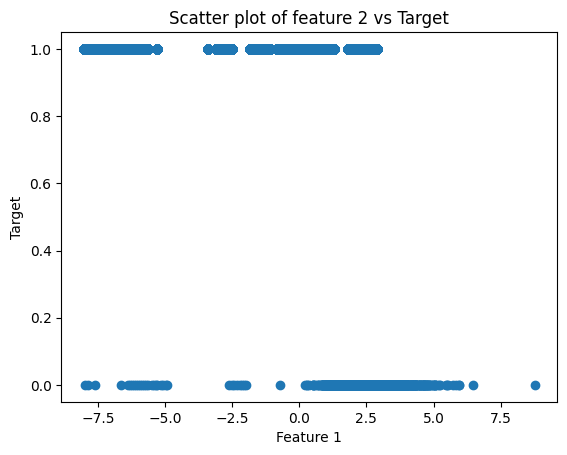

In [ ]:
plt.scatter(X_train1[:,0],Y_train1)
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Scatter plot of feature 2 vs Target')
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, Y_train)

# Predict labels for test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(Y_test, y_pred)


# Print the results
print('Accuracy:', accuracy_svm)


Accuracy: 0.9967896174863388
